# **Ex3 - Unsupervised learning**

In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [27]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [2]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes
 88% 36.0M/41.0M [00:00<00:00, 87.1MB/s]
100% 41.0M/41.0M [00:00<00:00, 115MB/s] 
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [28]:
#Loading the csv files
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

fake_columns = [0 for row in range(len(fake_df))]
true_columns = [1 for row in range(len(true_df))]

#creating label column
fake_df['label'] = fake_columns
true_df['label'] = true_columns

#Join the two files 
fake_and_true = pd.concat([fake_df, true_df]).drop_duplicates()

#Create the final dataset - df 
df = fake_and_true[['text','label']]

In [29]:
#Now, let's take a look on our dataset
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [30]:

scaler = StandardScaler()
#Extract the corpus and labels from our dataframe
corpus = list(df['text'])
labels = list(df['label'])

vectorizer = TfidfVectorizer(max_features = 1000, stop_words = 'english')
tf_idf_features = vectorizer.fit_transform(corpus) #vectorized
#Scale the data
tf_idf_features = scaler.fit_transform(tf_idf_features.todense())  #normalized

#Create kMeans model
kmeans = KMeans(n_clusters=2, random_state = 0).fit(tf_idf_features)
#Apply k-Means algorithm on the TF-IDF features  
predictions = kmeans.fit_predict(tf_idf_features)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



## 3. Visualize using scatter plot (20 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction suing PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [31]:
#Apply PCA
def apply_pca(data, n):
  pca = PCA(n_components=n).fit(data)
  pca_features = pca.transform(data)
  return pca_features
  


Text(0.5, 1.0, '2D Visualizaion of K-means Clustering ')

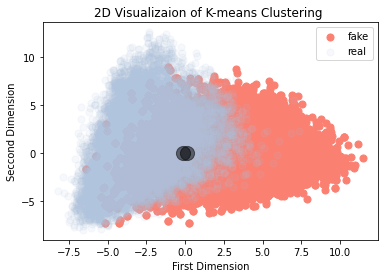

In [32]:
#2D visualization
 
pca_2D = apply_pca(data = tf_idf_features, n=2)
pca_2d_df = pd.DataFrame(pca_2D, columns = ["dim1","dim2"])
pca_2d_df["label"] = labels
fake = pca_2d_df[pca_2d_df["label"] ==0]
real = pca_2d_df[pca_2d_df["label"] ==1] 
plt.scatter(fake["dim1"], fake["dim2"],c = "salmon", s=50, label = "fake" )
plt.scatter(real["dim1"], real["dim2"], c= "lightsteelblue", s=50, label = "real", alpha = 0.1 )
plt.legend()
plt.xlabel("First Dimension")
plt.ylabel("Seccond Dimension")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('2D Visualizaion of K-means Clustering ')
 
 

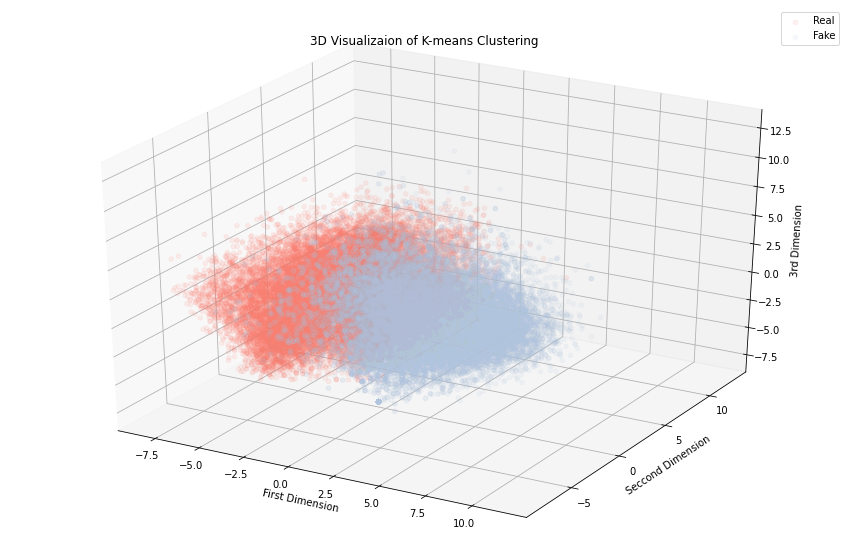

In [33]:

pca_3D = apply_pca(data = tf_idf_features, n=3)
df_2 = pd.DataFrame(pca_3D, columns = ['A','B','C'])
df_2["label"] = labels
centers = kmeans.cluster_centers_

 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection= "3d")
real = df_2[df_2["label"]==1]
fake =  df_2[df_2["label"]==0]
ax.scatter(real["A"],real["B"],real["C"], label = "Real", alpha=0.1, c = "salmon")
ax.scatter(fake["A"],fake["B"],fake["C"], label = "Fake", alpha=0.1, c= "lightsteelblue")
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
ax.set_xlabel("First Dimension")
ax.set_ylabel("Seccond Dimension")
ax.set_zlabel("3rd Dimension")
ax.legend()
plt.title("3D Visualizaion of K-means Clustering ")
plt.show()


 

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [35]:
 
#define cluster "0" as fake and cluster "1" as real 

f_acc = accuracy_score(labels, predictions)
first_accuracy = "Accuracy score when cluster 1 is fake and cluster 2 is real: " + str(f_acc)

#define cluster "1" as fake and cluster "0" as real  

opp_predictions = []

for elem in predictions:
  if elem==1:
    opp_predictions.append(0)
  if elem==0:
    opp_predictions.append(1)

s_acc = accuracy_score(labels,opp_predictions)
seccond_accuracy = "Accuracy score when cluster 1 is real and cluster 2 is fake: " + str(s_acc)


print(first_accuracy)
print(seccond_accuracy)

Accuracy score when cluster 1 is fake and cluster 2 is real: 0.8703260310143436
Accuracy score when cluster 1 is real and cluster 2 is fake: 0.12967396898565642


We can see that our model gets better accuracy (0.87) when the first cluster is defined as "real" prediction and the seccond is defind as "fake" prediction.

## 5. Find optimal `k` (20 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [37]:


silhoette_scores = []
ssds = []
k_lst = []

for k in range(2,21):
  k_lst.append(k)
  kmeans_opt = KMeans(n_clusters=k, random_state = 0).fit(tf_idf_features)
  sil_score = silhouette_score(tf_idf_features, kmeans_opt.labels_,metric = "euclidean", sample_size = 300, random_state =0)
  silhoette_scores.append(sil_score)
  ssds.append(kmeans_opt.inertia_)


  

 

In [38]:
 
np.random.seed(123)

df = pd.DataFrame()
df["K_values"] = k_lst
df["Silhouette_Scores"] = silhoette_scores
df["SSDS"] = ssds

 
fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(x=df['K_values'], y= df['Silhouette_Scores'], name = "Silhouette Scores"), secondary_y=True)  
fig.add_trace(go.Scatter(x=df['K_values'], y= df['SSDS'], name = "SSDs"), secondary_y=False)  

fig.update_layout(
    title_text="Silhoette and SSD scores according to different k values"
)

fig.update_xaxes(title_text="K values")
fig.update_yaxes(title_text="SSDs Scores", secondary_y=False)
fig.update_yaxes(title_text="Silhouette Scores", secondary_y=True)

fig.show()
 

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

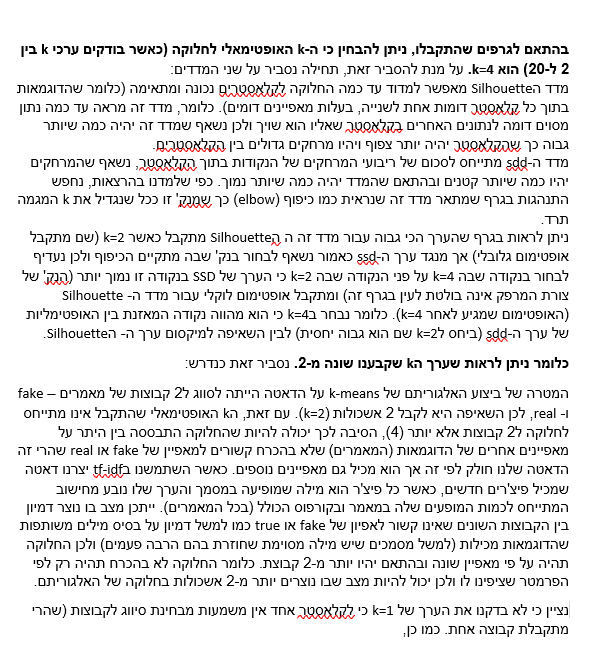

# 7. PCA then k-means (15 points)
This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

We normalized the data (the same as we did in the first question of the homework) in order to compare equally between the results. 

In [39]:
#1.Generate TF-IDF 1000 features


vectorizer_2 = TfidfVectorizer(max_features = 1000, stop_words = 'english') #tfidf
scaler = StandardScaler()
tf_idf_features_2 = vectorizer.fit_transform(corpus).toarray() #vectorized
tf_idf_features_2 = scaler.fit_transform(tf_idf_features_2)
#2.Create PCA 
pca_2 =PCA(n_components=1000).fit(tf_idf_features_2)

#apply pca

tf_idf_pca = pca_2.transform(tf_idf_features_2)

#3.1 Run k-means on 2D
kmeans_2 = KMeans(n_clusters=2, random_state = 0).fit(tf_idf_pca)
predictions_2 = kmeans.fit_predict(tf_idf_pca)



Text(0.5, 1.0, '2D Visualizaion of K-means Clustering ')

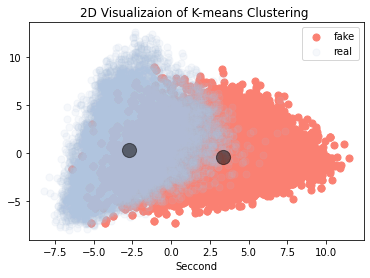

In [41]:
#4.1 plot 2D scatter plot 


pca_2d_2_df = pd.DataFrame(tf_idf_pca[:,[0,1]], columns = ["dim1","dim2"])
pca_2d_2_df["label"] = labels
fake = pca_2d_2_df[pca_2d_2_df["label"] ==0]
real = pca_2d_2_df[pca_2d_2_df["label"] ==1] 
plt.scatter(fake["dim1"], fake["dim2"],c = "salmon", s=50, label = "fake")
plt.scatter(real["dim1"], real["dim2"], s=50, label = "real", alpha = 0.1, c= "lightsteelblue" )
plt.legend()
centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel("First Dimension")
plt.xlabel("Seccond")
plt.title('2D Visualizaion of K-means Clustering ')
 

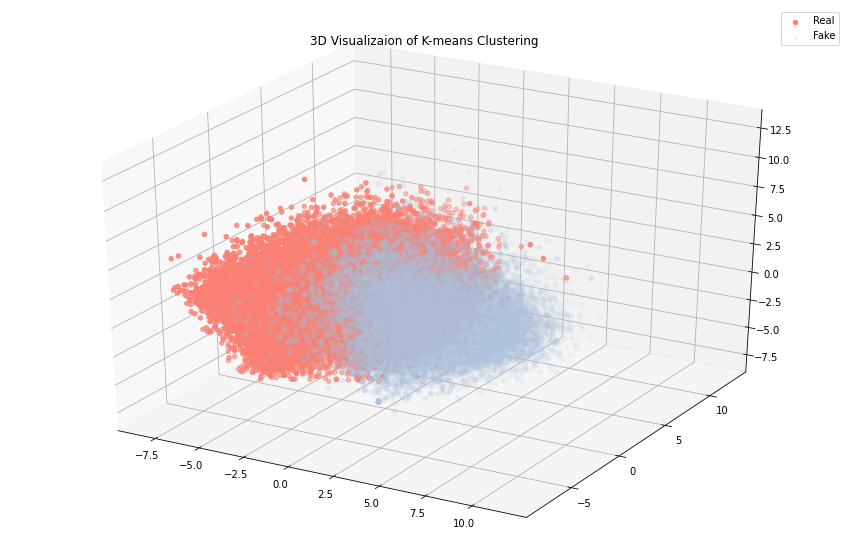

In [44]:
#4.2 plot 3D scatter plot 


df_pca = pd.DataFrame(tf_idf_pca[:,[0,1,2]], columns = ['A','B','C'])
df_pca["label"] = labels
centers = kmeans_2.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection= "3d")
real = df_pca[df_2["label"]==1]
fake =  df_pca[df_2["label"]==0]
ax.scatter(real["A"],real["B"],real["C"], label = "Real", c= "salmon" )
ax.scatter(fake["A"],fake["B"],fake["C"], label = "Fake", c= "lightsteelblue", alpha = 0.1)
plt.title("3D Visualizaion of K-means Clustering ")
ax.legend()
plt.show()

 




In [45]:


#5.Estimate the accuracy according to true labels  - ?on 2D?

#define cluster "0" as fake and cluster "1" as real 

pca = PCA().fit(tf_idf_features)
pca_features = pca.transform(tf_idf_features)
kmeans_pca = KMeans(n_clusters=2, random_state = 0).fit(pca_features)
predictions_pca = kmeans_pca.fit_predict(pca_features)


f_acc = accuracy_score(labels, predictions_pca)
first_accuracy = "Accuracy score when cluster 0 is fake and cluster 1 is real: " + str(f_acc)

#define cluster "1" as fake and cluster "0" as real  

opp_predictions = []

for elem in predictions_pca:
  if elem==1:
    opp_predictions.append(0)
  if elem==0:
    opp_predictions.append(1)

s_acc = accuracy_score(labels,opp_predictions)
seccond_accuracy = "Accuracy score when cluster 0 is real and cluster 1 is fake: " + str(s_acc)

print(first_accuracy)
print(seccond_accuracy)

Accuracy score when cluster 0 is fake and cluster 1 is real: 0.8703260310143436
Accuracy score when cluster 0 is real and cluster 1 is fake: 0.12967396898565642



We can see that in the first approach clustering is performed without PCA, which means that the k-means clustering is applied on the dataset that contains all of the features and then afterward we applied PCA to reduce the amount of features.
In the seccond approach, we first applied the PCA for reducing the amount of features in the dataset (since it was very big) and then applied the k-means on the dataset after performing PCA. 
As we can see in the graphs represented above and also in the results of the accuracy scored - the graphs of the 2D and 3D visualizations remains the same with minor changes and the accuracy score remained the same with the first and seccond approach. There have been no different in the results. A possible expelnation for this is that the PCA is that the PCA is changing the way the samples are scattered in the space and for that reason for some datasets (while using k means) it doesnt affter the prediction itself because the distances between the dots remain the same.  

In addition to that, we can see that in the first question the centers of the clusters were very closed and dense, whereas in the seccond question (appling PCA before the k-means algorithm) the centers of the clusters are located in the center of each cluster and the distances between them are bigger. As we explained, the PCA algorithm change the scatter of the samples in the space so in that way it allows the k means algorithm to accept better isolation between the different clusters, even tho the accuracy didnt change.

# Bonus (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [ ]:
# Implement here

*Your answers here*